# Baseline LSTM + TF-IDF Unigram

## Import Library

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Input, Flatten, Dense, LSTM, Dropout
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

## Import Dataset

In [12]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [13]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [14]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## TF-IDF

In [15]:
%%time
# define tf-idf
tf_idf = TfidfVectorizer(use_idf=True, smooth_idf=False,ngram_range=(1,1), max_features=1000)

# create dataframe using tf-idf
x_uni = pd.DataFrame(tf_idf.fit_transform(x).toarray(), columns=tf_idf.get_feature_names_out())
y_uni = y

x_uni

CPU times: user 356 ms, sys: 187 ms, total: 542 ms
Wall time: 552 ms


,abang,acara,ada,adab,adik,adil,admin,adu,aduh,agama,...,wasit,way,weeaboo,wifi,wkwk,woi,ya,yaman,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515955,0.0,0.0,0.0
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544035,0.0,0.0,0.0
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Splitting Data Ratio 70:30

In [16]:
# splitting data to 70:30
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_uni, y_uni, test_size = 0.3, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [17]:
%%time
# define the LSTM model
lstm_model = tf.keras.models.Sequential() # create sequential model 
lstm_model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation=tf.keras.layers.LeakyReLU(alpha=0.001), return_sequences=True)) # first lstm layer with 64 filters, relu activation, return sequences set to true
lstm_model.add(Dropout(0.2)) # add dropout layer 0.2
lstm_model.add(Flatten()) # flatten the output
lstm_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# Compile the model
lstm_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# plot model architecture
plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
lstm_model_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = lstm_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = lstm_model.predict(X_test)
y_true = y_test

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 64)             272640    
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 272,705
Trainable params: 272,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
318/318 [==============================] - 5s 10ms/step - loss: 0.6030 - accuracy: 0.7355 - val_loss: 0.4998 - val_accuracy: 0.7806
Epoch 2/5
318/318 [===================

In [18]:
# show the classification report from the Model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')

print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.7849    0.8000    0.7923      4424
           1     0.7898    0.7742    0.7819      4296

    accuracy                         0.7873      8720
   macro avg     0.7874    0.7871    0.7871      8720
weighted avg     0.7873    0.7873    0.7872      8720



In [19]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('F1 Score        :', f1score)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)

Accuracy Score  : 0.7872706422018348
F1 Score        : 0.787219960383091
Precision Score : 0.7898361434338637
Recall Score    : 0.7742085661080075


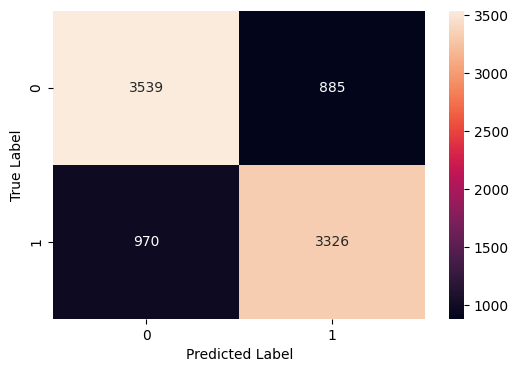

In [20]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()